In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# loading the data
df = pd.read_csv('Downloads/insurance1.csv')
new_df = df.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### The above data contains 1338 rows and 7 Columns



## EDA

In [3]:
df.isna().sum() # we have no missing values in the data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info() # We can see that all feature are of the right data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.duplicated().sum()

1

In [7]:
df = df.drop_duplicates() # dropping the duplicated row
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# counting the unique values in the smokers column
df.value_counts('smoker')

smoker
no     1063
yes     274
Name: count, dtype: int64

In [9]:
# counting the unique values in the sex column
df.value_counts('sex')

sex
male      675
female    662
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

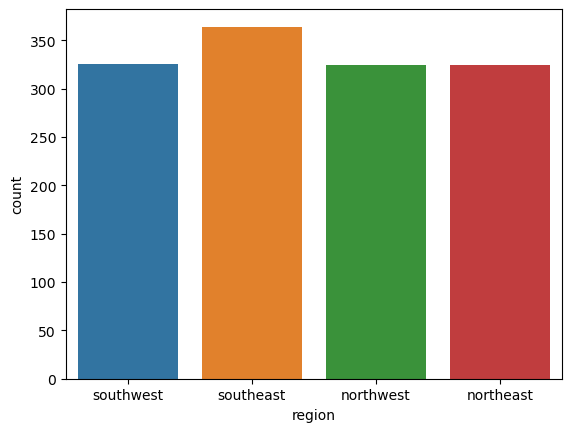

In [10]:
# lets plot the region column to see how many unique catigories we have
sns.countplot(data=df, x='region')


<Axes: xlabel='bmi'>

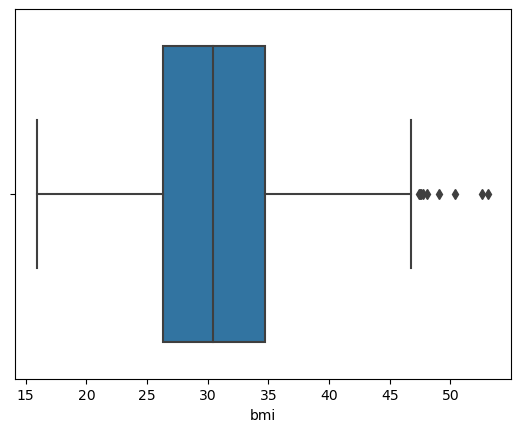

In [11]:
sns.boxplot(data=df, x='bmi') 

<Axes: xlabel='charges', ylabel='Count'>

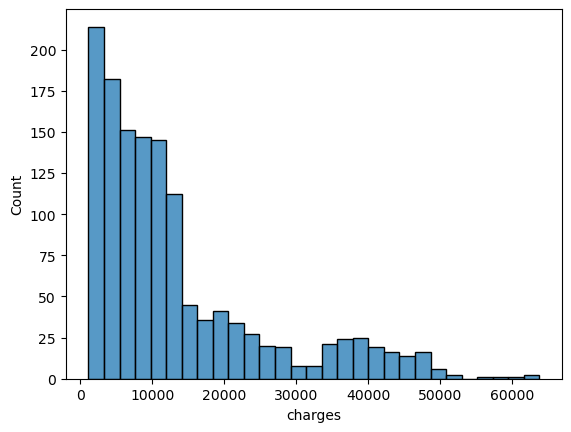

In [12]:
sns.histplot(data=df, x='charges')

<Axes: xlabel='bmi', ylabel='region'>

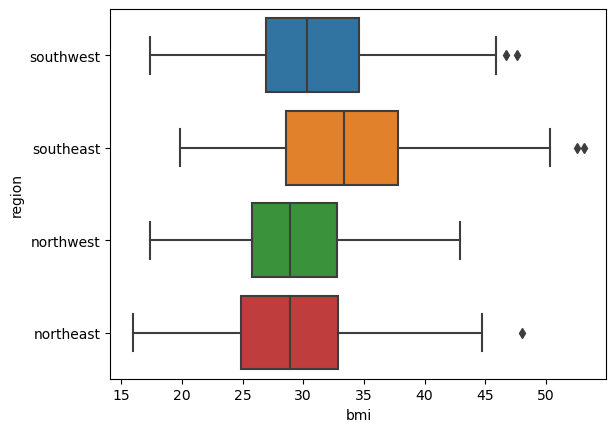

In [13]:
sns.boxplot(data=df, x='bmi', y='region') 

<Axes: xlabel='bmi', ylabel='Count'>

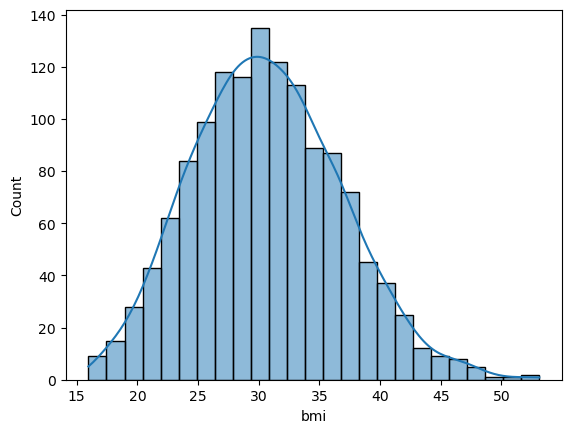

In [14]:
sns.histplot(df, x='bmi', kde=True)

### Removing the outliers from the data


In [15]:
upper_limit = df.bmi.mean() +3*df.bmi.std()
upper_limit

48.96485698651382

In [16]:
lower_limit = df.bmi.mean() -3*df.bmi.std()
lower_limit

12.362046528819015

In [17]:
# Displaying the outlers in the data 
df[(df.bmi>upper_limit) | (df.bmi<lower_limit)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [18]:
# creating a new dataframe without the outliers
df =df[(df.bmi<upper_limit) & (df.bmi>lower_limit)]
df.shape

(1333, 7)

In [19]:
dataframe = new_df

dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
# converting the categorical variables into numerical variables using label encoder


encoder= LabelEncoder()

cat_col = df.select_dtypes(exclude='number')

for i in cat_col:
    df[i] = encoder.fit_transform(df[i])
df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: xlabel='smoker', ylabel='count'>

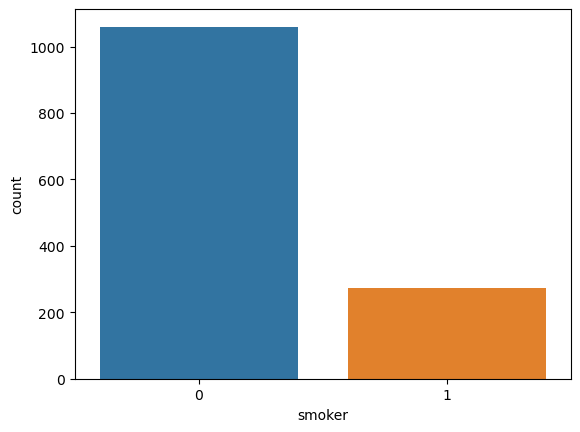

In [21]:
sns.countplot(df, x='smoker')

<Axes: xlabel='children', ylabel='Count'>

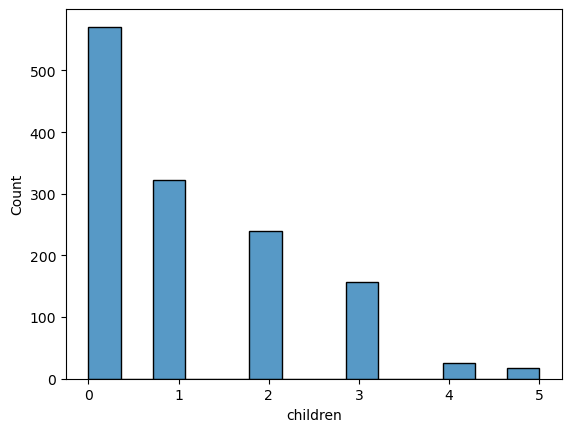

In [22]:
sns.histplot(df, x='children')

<Axes: xlabel='age', ylabel='Count'>

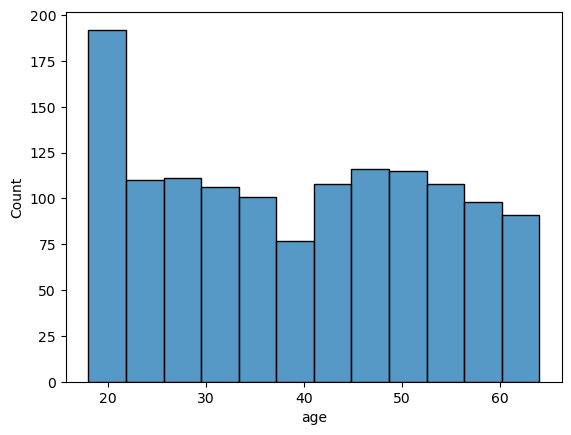

In [23]:
sns.histplot(df, x='age')

<Axes: xlabel='smoker', ylabel='charges'>

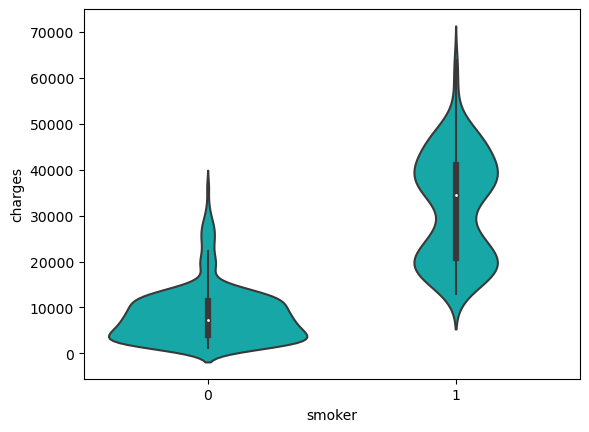

In [24]:
sns.violinplot(data=df, x='smoker', y='charges', hue=None ,color='c')


### As we see above in the bivariate analysis of charges and smoker, if the person has a smoker then he/she pay high medical insurance.

<Axes: xlabel='children', ylabel='charges'>

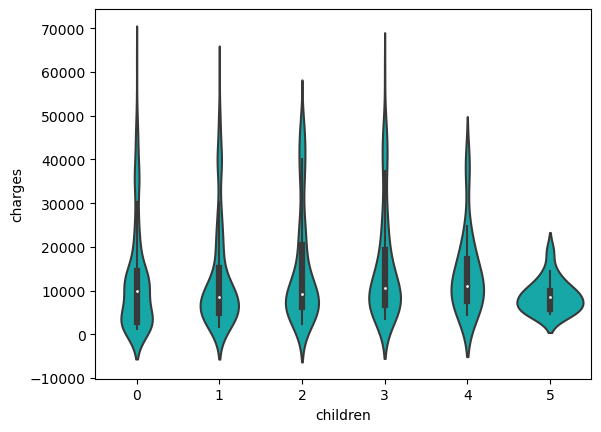

In [25]:
sns.violinplot(data=df, x='children', y='charges', hue=None ,color='c')



<Axes: xlabel='sex', ylabel='charges'>

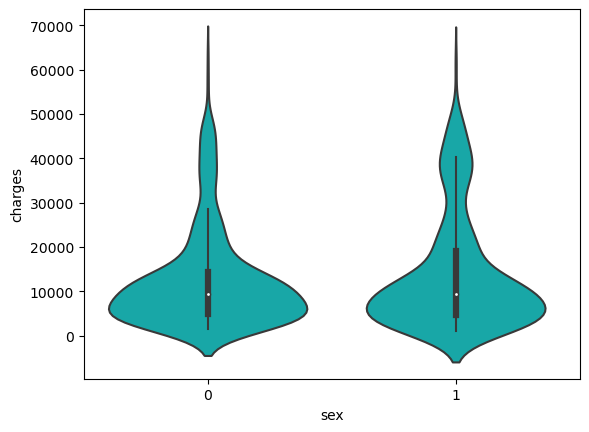

In [26]:
sns.violinplot(data=df, x='sex', y='charges', hue=None ,color='c')



<Axes: xlabel='sex', ylabel='charges'>

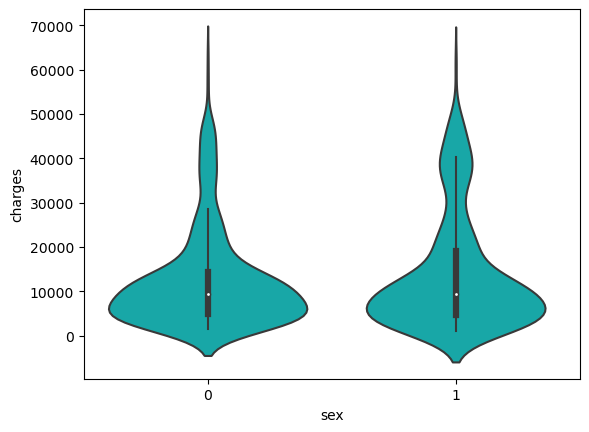

In [27]:
sns.violinplot(data=df, x='sex', y='charges', hug='smoker', color='c')



<Axes: >

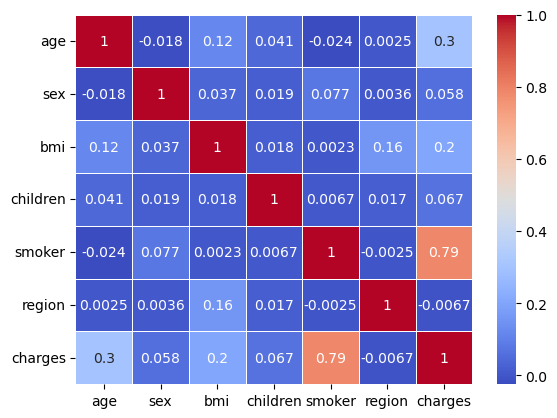

In [28]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
#plt.figure(figsize=(16, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)




### From the correlation matrix we came to know that the charges and smoker has a correlation with the value of 0.79, which means smoker column has a greater influence on the charges of medical insurance.


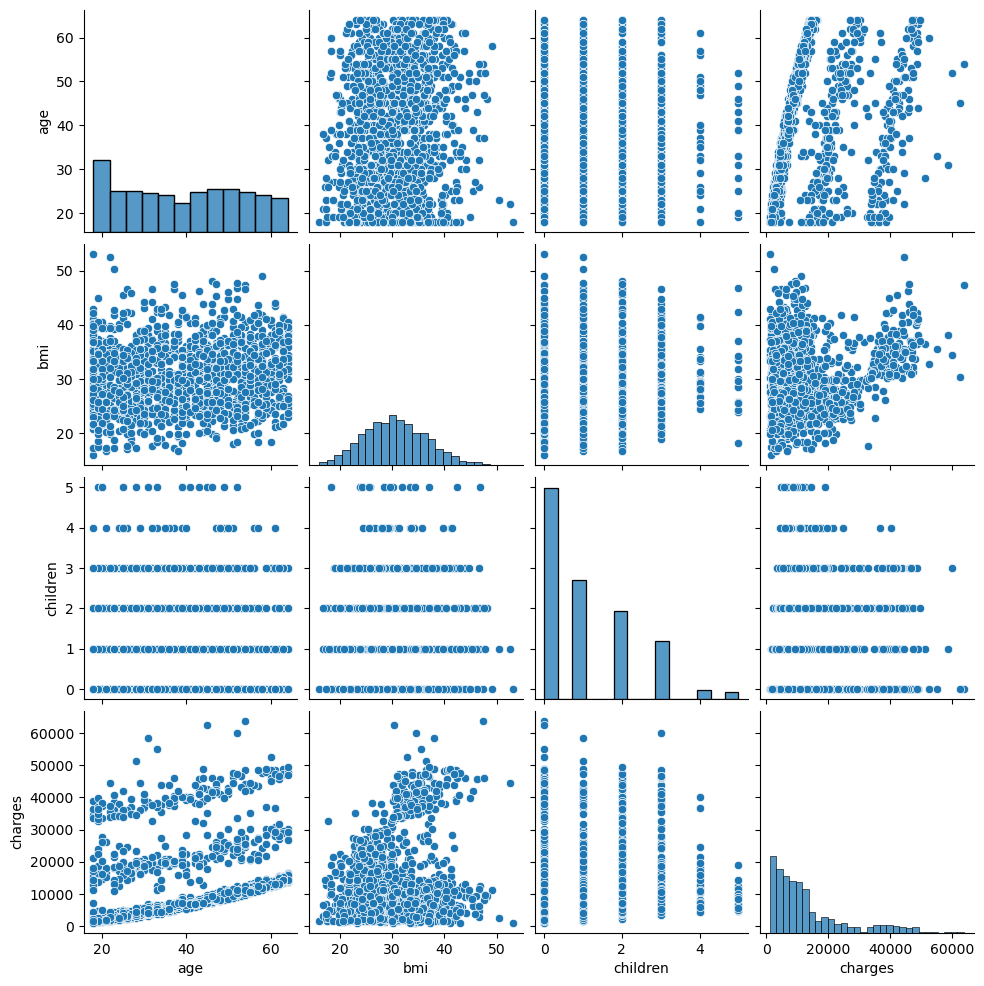

In [29]:
sns.pairplot(new_df)

## Data Preprocessing and Modelling

In [30]:

Dataframe = pd.DataFrame(new_df)
Dataframe.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Splitting into Train and test set

In [31]:
x = Dataframe.drop('charges', axis=1)
y = Dataframe['charges']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)
                                                   

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

### Y_train Encoding

In [32]:
ohe= OneHotEncoder(handle_unknown="ignore")

x_train_ohe= ohe.fit_transform(x_train[['sex', 'smoker', 'region']])
x_train_ohe= x_train_ohe.toarray()

x_train_ohe_df= pd.DataFrame(x_train_ohe, columns=ohe.get_feature_names_out(['sex', 'smoker', 'region']))

# One-hot encoding removed an index. Let's put it back:
x_train_ohe_df.index= x_train.index

# Joining the tables
x_train = pd.concat([x_train, x_train_ohe_df], axis=1)

# Dropping old categorical columns
x_train.drop(["sex", "smoker", "region"], axis=1, inplace=True)

# Checking result
x_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,47,24.32,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,52,24.86,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,39,34.32,5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,54,21.47,3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### X_test Encoding

In [33]:
x_test_ohe= ohe.transform(x_test[['sex', 'smoker', 'region']])
x_test_ohe= x_test_ohe.toarray()

x_test_ohe_df= pd.DataFrame(x_test_ohe, columns=ohe.get_feature_names_out(['sex', 'smoker', 'region']))
#print(x_test_ohe_df)

# One-hot encoding removed an index. Let's put it back:
x_test_ohe_df.index= x_test.index

# Joining the tables
x_test= pd.concat([x_test, x_test_ohe_df], axis=1)

# Dropping old categorical columns
x_test.drop(["sex", "smoker", "region"], axis=1, inplace=True)

# Checking result
x_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
887,36,30.020,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
890,64,26.885,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1293,46,25.745,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
259,19,31.920,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [34]:
models_parameters = {
    "LinearRegression": [LinearRegression(), {'n_jobs':[-1]}],
    "RandomForestRegressor": [RandomForestRegressor(), {'n_estimators':[100], 'max_depth':[10], 'min_samples_split':[2], 'criterion':['squared_error']}],
    "DecisionTreeRegressor": [DecisionTreeRegressor(), {'splitter':['best'], 'max_depth':[12], 'min_samples_split':[2],'criterion':['squared_error']}],
    "GradientBoostingRegressor": [GradientBoostingRegressor(), {'n_estimators':[120], 'learning_rate':[0.1],'max_depth':[12], 'min_samples_leaf':[3],'loss':['squared_error']}],
    "SupportVectorRegressor": [SVR(), {'kernel':['rbf'], 'gamma':['scale']}],
    "CatBoostRegressor": [CatBoostRegressor(), {"learning_rate":[0.1], "max_depth": [10], "verbose": [0], "loss_function":['RMSE']}], 
    "Lasso": [Lasso(), {'alpha':[1.0,1.1],'max_iter':[1000,1200],'selection':['cyclic', 'random']}],
    "Ridge": [Ridge(), {'alpha':[1.0,1.1],'max_iter':[1000,1200],'solver':['auto','svd','lsqr']}]
}

In [35]:
results_df = pd.DataFrame(columns=["Model", "Best_Params", "RMSE"])

# Loop through each model and its hyperparameters in the models_parameters dictionary
for model_name, (model, hyperparameters) in models_parameters.items():
    # Create a GridSearchCV instance for the current model and hyperparameters
    grid_search = GridSearchCV(model, hyperparameters, cv=5, scoring='neg_root_mean_squared_error')
    
    # Fit the GridSearchCV to the training data
    grid_search.fit(x_train, y_train)
    
    # Get the best model and its best hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Make predictions using the best model on the test data
    y_pred = best_model.predict(x_test)
    
    # Calculate the root mean squared error (RMSE) for the predictions
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Append the model results to the results DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([[model_name, best_params, rmse]], columns=results_df.columns)], ignore_index=True)

print(results_df)

                       Model  \
0           LinearRegression   
1      RandomForestRegressor   
2      DecisionTreeRegressor   
3  GradientBoostingRegressor   
4     SupportVectorRegressor   
5          CatBoostRegressor   
6                      Lasso   
7                      Ridge   

                                         Best_Params          RMSE  
0                                     {'n_jobs': -1}   5796.284659  
1  {'criterion': 'squared_error', 'max_depth': 10...   4575.371448  
2  {'criterion': 'squared_error', 'max_depth': 12...   6237.869981  
3  {'learning_rate': 0.1, 'loss': 'squared_error'...   5172.694701  
4                {'gamma': 'scale', 'kernel': 'rbf'}  12903.571294  
5  {'learning_rate': 0.1, 'loss_function': 'RMSE'...   5037.077227  
6  {'alpha': 1.0, 'max_iter': 1200, 'selection': ...   5797.065133  
7  {'alpha': 1.0, 'max_iter': 1000, 'solver': 'au...   5798.271036  
